In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from sklearn.linear_model import LogisticRegression #Logistic 回归算法
from sklearn.svm import SVC, LinearSVC #SVM 支持向量机分类算法
from sklearn.ensemble import RandomForestClassifier #随机森林分类器算法
from sklearn.neighbors import KNeighborsClassifier # KNN近邻算法
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯算法
from sklearn.linear_model import Perceptron # 感知器算法
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier #决策树算法
path1=r'D:\Python\Titanic\test.csv'
path2=r'D:\Python\Titanic\train.csv'
train_df=pd.read_csv(path2)
test_df=pd.read_csv(path1)

In [2]:
print(train_df.info())
print('*'*50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

In [3]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 数据清理

In [5]:
train_df['Survived']=train_df.Survived.astype('int')
data=pd.concat([train_df,test_df])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [6]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [7]:
data.Embarked.fillna('S',inplace=True) # 填充登入窗口，使用众数填充
data.Embarked.isnull().sum()

0

In [8]:
data.Fare.fillna(data.Fare.mean(),inplace=True) #使用均数填充价格缺失值

In [9]:
pd.crosstab(train_df.Sex,train_df.Survived,margins=True) #可以看出，性别对生存与否是由关联的.crosstab是用于计算分组频率的特殊透视表

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [10]:
data.Sex.map({'female':0,'male':1}).corr(data.Survived) #查看相关性

-0.54335138065775423

In [11]:
train_df[['Survived','Pclass']].groupby('Pclass').mean().sort_values('Survived',ascending=False) 
#查看pclass对生存率的影响并按降序排列

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [12]:
#增加新的特征，对name进行处理
def extract(x):
    x1=x.split(',')[1]
    y=x1.split('.')[0]
    return y
m=data.Name.apply(extract)
data['professional']=m
set(data['professional'])

{' Capt',
 ' Col',
 ' Don',
 ' Dona',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Master',
 ' Miss',
 ' Mlle',
 ' Mme',
 ' Mr',
 ' Mrs',
 ' Ms',
 ' Rev',
 ' Sir',
 ' the Countess'}

In [13]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,professional
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [14]:
pd.crosstab(data.professional,data.Sex)

Sex,female,male
professional,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [15]:
data['professional']=data.professional.replace([' Capt',' Col',' Don',
 ' Dona',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Rev',
 ' Sir',
 ' the Countess'],'Rare')

In [16]:
set(data.professional)

{' Master', ' Miss', ' Mlle', ' Mme', ' Mr', ' Mrs', ' Ms', 'Rare'}

In [17]:
data['professional']=data.professional.replace({' Mlle':' Miss',' Mme':' Mrs',' Ms':' Miss'})

In [18]:
train_df.Age.isnull().sum()

177

In [19]:
nian=data[pd.isnull(data.Age)] #获取年龄为Nan的

In [20]:
pd.crosstab(nian.Sex,nian.Pclass)

Pclass,1,2,3
Sex,,,
female,11,3,64
male,28,13,144


In [21]:
# 对年龄得缺失值进行处理
age_avg = data['Age'].mean()
age_std = data['Age'].std()
age_null_count = data['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
data['Age'][pd.isnull(data.Age)] = age_null_random_list
data['Age'] = data['Age'].astype(int)

C:\Users\kkluc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
data['Age_cut']=pd.cut(data.Age,5)
set(data['Age_cut'])

{Interval(-0.080000000000000002, 16.0, closed='right'),
 Interval(16.0, 32.0, closed='right'),
 Interval(32.0, 48.0, closed='right'),
 Interval(48.0, 64.0, closed='right'),
 Interval(64.0, 80.0, closed='right')}

In [23]:
data[['Age_cut','Survived']].groupby('Age_cut',as_index=False).mean()

,Age_cut,Survived
0,"(-0.08, 16.0]",0.495575
1,"(16.0, 32.0]",0.359823
2,"(32.0, 48.0]",0.375510
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [24]:
# 由于Cabin缺失值比较严重，且种类多，因此我们只考虑采用大类进行分
data.Cabin.fillna('Unknow',inplace=True) #用unknow表示不清楚什么登入窗口


In [25]:
data.Cabin.head()

0    Unknow
1       C85
2    Unknow
3      C123
4    Unknow
Name: Cabin, dtype: object

In [26]:
data['Cabin_cat']=data.Cabin.apply(lambda x:x[0]) #提取cabin大类

In [27]:
set(data.Cabin_cat)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'}

In [28]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,professional,Age_cut,Cabin_cat
0,22,Unknow,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,"(16.0, 32.0]",U
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,"(32.0, 48.0]",C
2,26,Unknow,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,"(16.0, 32.0]",U
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,"(32.0, 48.0]",C
4,35,Unknow,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,"(32.0, 48.0]",U


In [29]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [30]:
drop_element=['Cabin','Name','Ticket','PassengerId']
data=data.drop(drop_element,axis=1)
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,professional,Age_cut,Cabin_cat,FamilySize
0,22,S,7.2500,0,3,male,1,0.0,Mr,"(16.0, 32.0]",U,2
1,38,C,71.2833,0,1,female,1,1.0,Mrs,"(32.0, 48.0]",C,2
2,26,S,7.9250,0,3,female,0,1.0,Miss,"(16.0, 32.0]",U,1
3,35,S,53.1000,0,1,female,1,1.0,Mrs,"(32.0, 48.0]",C,2
4,35,S,8.0500,0,3,male,0,0.0,Mr,"(32.0, 48.0]",U,1


In [31]:
data['is_alone?']=data.FamilySize.apply(lambda x:"alone" if x==1 else "not alone") #获取家庭是否一个人


In [32]:
data['is_alone?'].value_counts()

alone        790
not alone    519
Name: is_alone?, dtype: int64

In [33]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,professional,Age_cut,Cabin_cat,FamilySize,is_alone?
0,22,S,7.2500,0,3,male,1,0.0,Mr,"(16.0, 32.0]",U,2,not alone
1,38,C,71.2833,0,1,female,1,1.0,Mrs,"(32.0, 48.0]",C,2,not alone
2,26,S,7.9250,0,3,female,0,1.0,Miss,"(16.0, 32.0]",U,1,alone
3,35,S,53.1000,0,1,female,1,1.0,Mrs,"(32.0, 48.0]",C,2,not alone
4,35,S,8.0500,0,3,male,0,0.0,Mr,"(32.0, 48.0]",U,1,alone


In [34]:
data['Embarked']=data.Embarked.astype(str)
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,professional,Age_cut,Cabin_cat,FamilySize,is_alone?
0,22,S,7.2500,0,3,male,1,0.0,Mr,"(16.0, 32.0]",U,2,not alone
1,38,C,71.2833,0,1,female,1,1.0,Mrs,"(32.0, 48.0]",C,2,not alone
2,26,S,7.9250,0,3,female,0,1.0,Miss,"(16.0, 32.0]",U,1,alone
3,35,S,53.1000,0,1,female,1,1.0,Mrs,"(32.0, 48.0]",C,2,not alone
4,35,S,8.0500,0,3,male,0,0.0,Mr,"(32.0, 48.0]",U,1,alone


In [35]:
data['Embarked']=data.Embarked.map({'S':0,'C':1,'Q':2}) #对embarked进行数据化
data['Sex']=data.Sex.map({'male':0,'female':1}) #对sex进行数据化
data['is_alone?']=data['is_alone?'].map({'not alone':0,'alone':1})

In [36]:
# 年龄分段
def nianling(i):
    if i<=16:
        return 0
    elif i<=32:
        return 1
    elif i<=48:
        return 2
    elif i<=64:
        return 3
    else:
        return 4
data['level']=data.Age.apply(nianling)


In [37]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,professional,Age_cut,Cabin_cat,FamilySize,is_alone?,level
0,22,0,7.2500,0,3,0,1,0.0,Mr,"(16.0, 32.0]",U,2,0,1
1,38,1,71.2833,0,1,1,1,1.0,Mrs,"(32.0, 48.0]",C,2,0,2
2,26,0,7.9250,0,3,1,0,1.0,Miss,"(16.0, 32.0]",U,1,1,1
3,35,0,53.1000,0,1,1,1,1.0,Mrs,"(32.0, 48.0]",C,2,0,2
4,35,0,8.0500,0,3,0,0,0.0,Mr,"(32.0, 48.0]",U,1,1,2


In [38]:
#对 professional数据化
def pr(x):
    j=x.lstrip()
    return j
data.professional.apply(pr)
set(data.professional)
data['professional']=data.professional.map({" Mr": 1, " Miss": 2, " Mrs": 3, " Master": 4, "Rare": 5})

In [39]:
# 对cabin——cat数据化
data.Cabin_cat=data.Cabin_cat.apply(lambda x:0 if x=='U' else 1 if x=='C' else 2)

In [40]:
data=data.drop(['Age_cut'],axis=1)
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,professional,Cabin_cat,FamilySize,is_alone?,level
0,22,0,7.2500,0,3,0,1,0.0,1,0,2,0,1
1,38,1,71.2833,0,1,1,1,1.0,3,1,2,0,2
2,26,0,7.9250,0,3,1,0,1.0,2,0,1,1,1
3,35,0,53.1000,0,1,1,1,1.0,3,1,2,0,2
4,35,0,8.0500,0,3,0,0,0.0,1,0,1,1,2


# 数据可视化

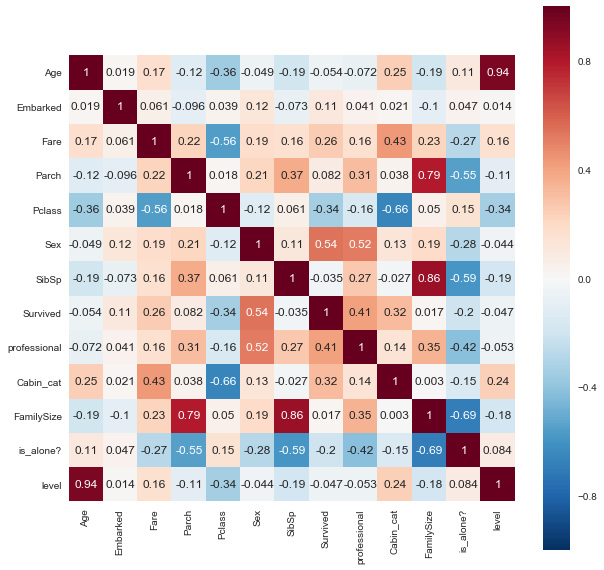

In [41]:
# sns相关性热图
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=1,square=True, linecolor='white',annot=True) 
plt.show()

In [42]:
data.corr().Survived.sort_values()

Pclass         -0.338481
is_alone?      -0.203367
Age            -0.054408
level          -0.047490
SibSp          -0.035322
FamilySize      0.016639
Parch           0.081629
Embarked        0.106811
Fare            0.257307
Cabin_cat       0.316713
professional    0.407753
Sex             0.543351
Survived        1.000000
Name: Survived, dtype: float64

In [43]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,professional,Cabin_cat,FamilySize,is_alone?,level
0,22,0,7.2500,0,3,0,1,0.0,1,0,2,0,1
1,38,1,71.2833,0,1,1,1,1.0,3,1,2,0,2
2,26,0,7.9250,0,3,1,0,1.0,2,0,1,1,1
3,35,0,53.1000,0,1,1,1,1.0,3,1,2,0,2
4,35,0,8.0500,0,3,0,0,0.0,1,0,1,1,2


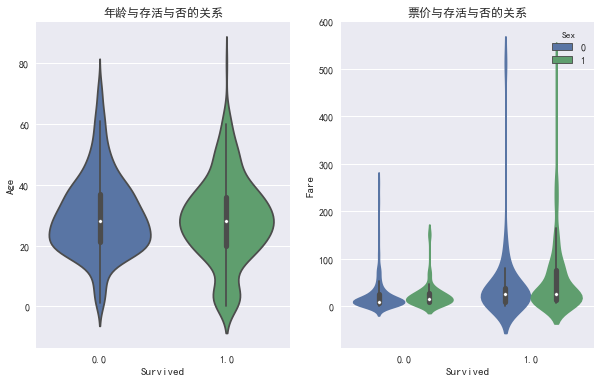

In [44]:
plt.figure(figsize=(10,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False  #导入pyplot并将绘图系统中设置正负号和字体
# age分布情况
plt.subplot(121)
sns.violinplot(x='Survived',y='Age',data=data)
plt.title("年龄与存活与否的关系")
plt.subplot(122)
sns.violinplot(x='Survived',y='Fare',hue='Sex',data=data)
plt.title("票价与存活与否的关系")
plt.show()

C:\Users\kkluc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


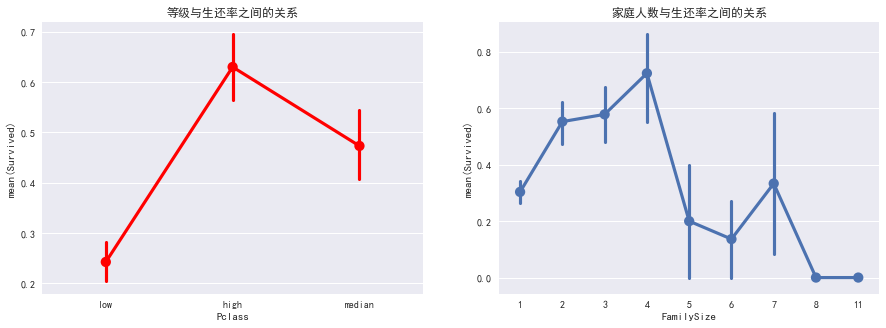

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(121)
data_pclass=data[['Pclass','Survived']]
data_pclass['Pclass']=data_pclass.Pclass.map({3:'low',2:'median',1:'high'})
sns.pointplot(x='Pclass',y='Survived',data=data_pclass,color='red')
plt.title("等级与生还率之间的关系")

plt.subplot(122)
sns.pointplot(x='FamilySize',y='Survived',data=data)
plt.title("家庭人数与生还率之间的关系")
plt.show()

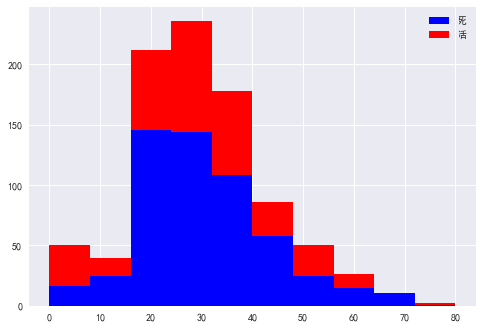

In [46]:
plt.hist(x=[data[data.Survived==0&pd.notnull(data.Survived)]['Age'],data[data.Survived==1&pd.notnull(data.Survived)]['Age']],color=['b','r'],label=['死','活'],stacked=True)
plt.legend()
plt.show()

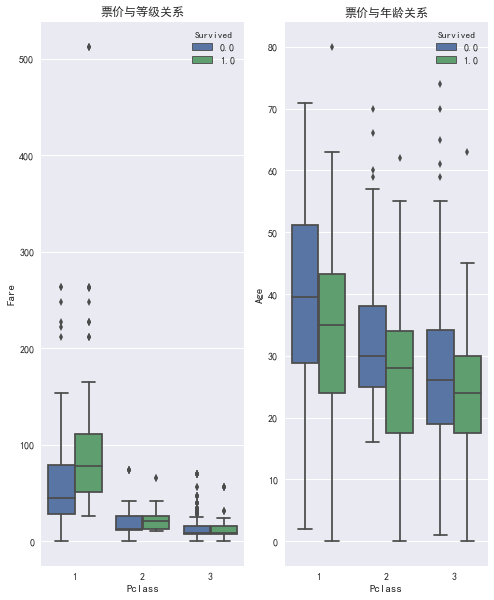

In [47]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(8,10))

sns.boxplot(x='Pclass',y='Fare',data=data,hue='Survived',ax=axis1)
axis1.set_title("票价与等级关系")
sns.boxplot(x='Pclass',y='Age',data=data,hue='Survived',ax=axis2)
axis2.set_title("票价与年龄关系")
plt.show()

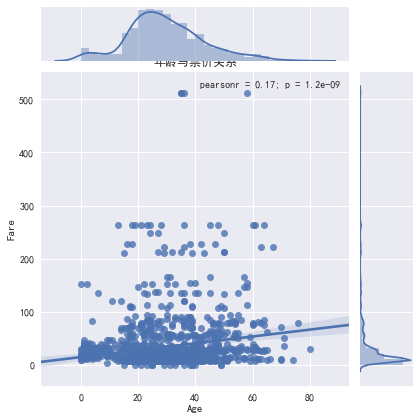

In [48]:
sns.jointplot(x='Age',y='Fare',data=data,kind='reg')  #sns中联合分布图像
plt.title("年龄与票价关系")
plt.show()

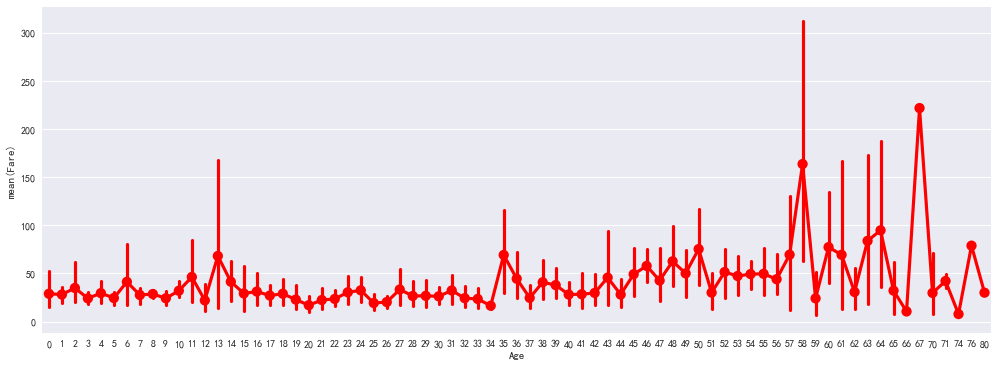

In [49]:
plt.figure(figsize=(17,6))
sns.pointplot(x='Age',y='Fare',data=data,color='red',alpha=0.8)
plt.show()

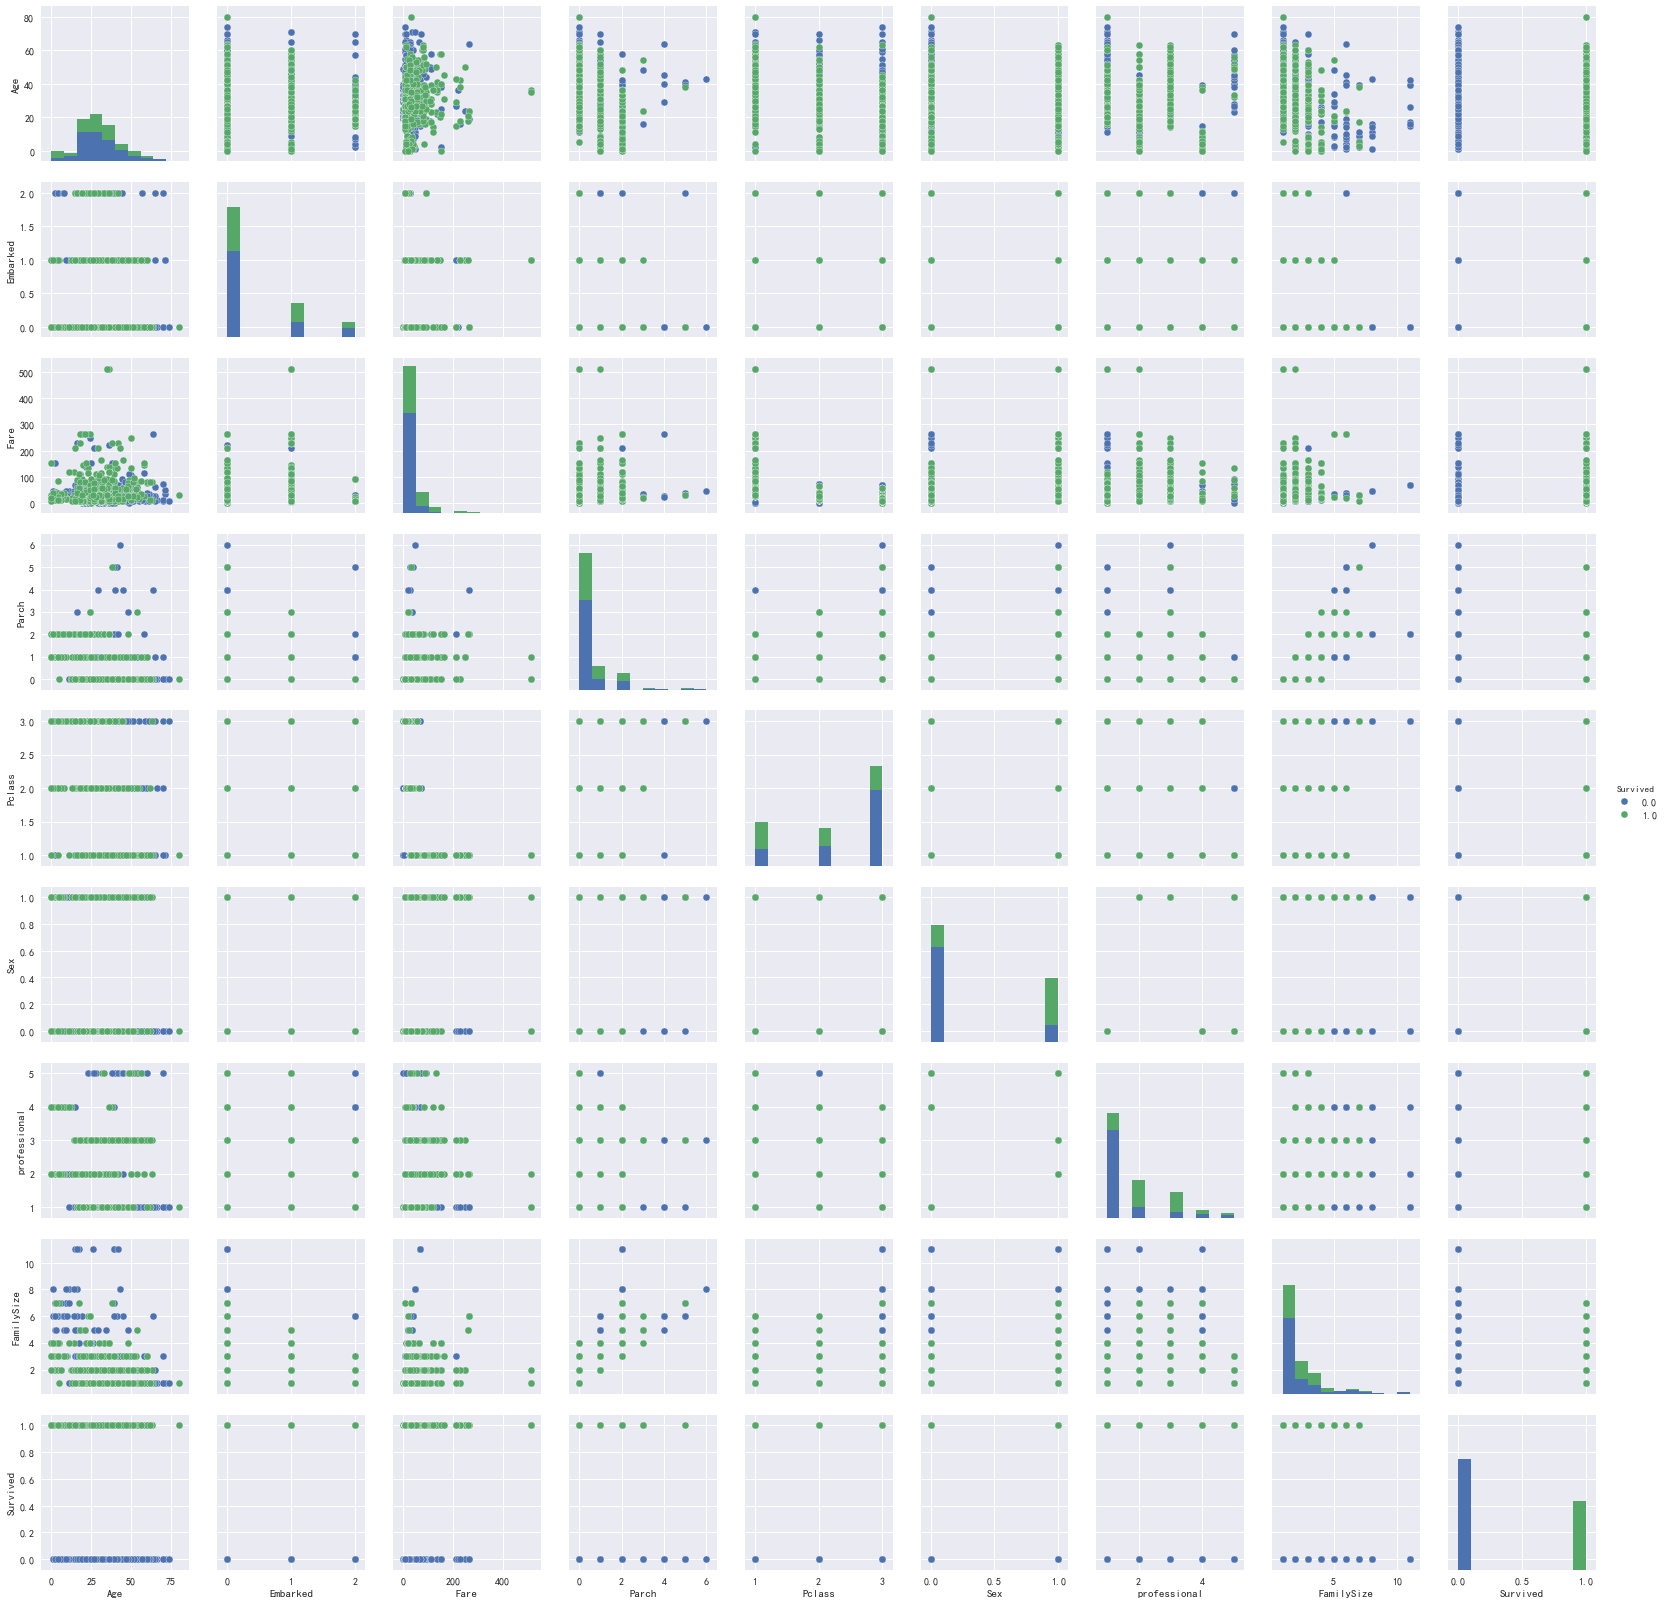

In [50]:
sns.pairplot(data[['Age','Embarked','Fare','Parch','Pclass','Sex','professional','FamilySize','Survived']],hue='Survived')
plt.show()

In [51]:
data.Pclass.value_counts()/data.Pclass.value_counts().sum()  #等级占比情况

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

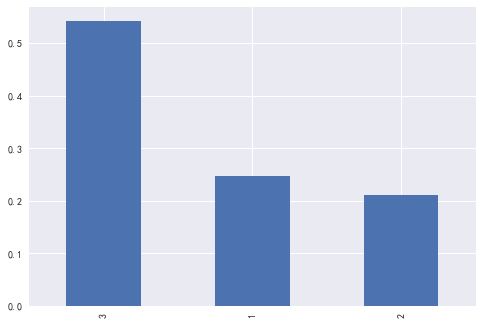

In [52]:
(data.Pclass.value_counts()/data.Pclass.value_counts().sum()).plot(kind='bar')

plt.show()

In [53]:
da=data.Pclass.value_counts()/data.Pclass.value_counts().sum()
Da=pd.DataFrame(da)
Da.index=list('abc')
Da.columns=['k'] #修改索引和列名
Da


,k
a,0.541635
b,0.246753
c,0.211612


# 提取模型数据

In [54]:
#提取除处理后的训练集和测试集
train=data.iloc[:len(train_df),:]
test=data.iloc[len(train_df):,:]
train.isnull().sum()

Age             0
Embarked        0
Fare            0
Parch           0
Pclass          0
Sex             0
SibSp           0
Survived        0
professional    0
Cabin_cat       0
FamilySize      0
is_alone?       0
level           0
dtype: int64

In [90]:
shuju=train.copy()

In [91]:
from sklearn import model_selection

In [93]:
shuju_train_x,shuju_test_x,shuju_train_y,shuju_test_y=model_selection.train_test_split(shuju.drop(['Survived'],axis=1),shuju['Survived'])

In [94]:
shuju_train_x.shape

(668, 12)

In [95]:
shuju_test_x.shape

(223, 12)

In [55]:
test.isnull().sum()

Age               0
Embarked          0
Fare              0
Parch             0
Pclass            0
Sex               0
SibSp             0
Survived        418
professional      0
Cabin_cat         0
FamilySize        0
is_alone?         0
level             0
dtype: int64

In [56]:
test.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,professional,Cabin_cat,FamilySize,is_alone?,level
0,34,2,7.8292,0,3,0,0,NaN,1,0,1,1,2
1,47,0,7.0000,0,3,1,1,NaN,3,0,2,0,2
2,62,2,9.6875,0,2,0,0,NaN,1,0,1,1,3
3,27,0,8.6625,0,3,0,0,NaN,1,0,1,1,1
4,22,0,12.2875,1,3,1,1,NaN,3,0,3,0,1


In [57]:
train.to_excel(r'D:\train.xlsx')

# PCA提取主成分因子分析

In [58]:
from sklearn.decomposition import  PCA

In [59]:
pca=PCA()
pca.fit(train.drop('Survived',axis=1))


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca.explained_variance_ratio_

array([  9.29318844e-01,   6.81111377e-02,   1.41557789e-03,
         3.98001543e-04,   2.30097013e-04,   1.83534231e-04,
         1.44762095e-04,   7.00870618e-05,   5.79882498e-05,
         3.93328734e-05,   3.06373658e-05,   2.09528869e-35])

# LR model

In [61]:
train.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'professional', 'Cabin_cat', 'FamilySize', 'is_alone?',
       'level'],
      dtype='object')

In [62]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
train_x=train.drop(['Survived'],axis=1)
train_y=train['Survived']
lrf=LogisticRegression()
lrf.fit(train_x,train_y)
print('LR 得分情况:%s'%lrf.score(train_x,train_y))

LR 得分情况:0.818181818182


In [64]:
len(test_df.PassengerId)

418

In [65]:
test.drop(['Survived'],axis=1,inplace=True)
test.head()


C:\Users\kkluc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,professional,Cabin_cat,FamilySize,is_alone?,level
0,34,2,7.8292,0,3,0,0,1,0,1,1,2
1,47,0,7.0000,0,3,1,1,3,0,2,0,2
2,62,2,9.6875,0,2,0,0,1,0,1,1,3
3,27,0,8.6625,0,3,0,0,1,0,1,1,1
4,22,0,12.2875,1,3,1,1,3,0,3,0,1


In [66]:
result=lrf.predict(test)
LR_jieguo=pd.DataFrame({'ID':test_df['PassengerId'],'预测':result})
LR_jieguo.head()



,ID,预测
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [97]:
shuju_lr=LogisticRegression()
shuju_lr.fit(shuju_train_x,shuju_train_y)
shuju_lr.score(shuju_train_x,shuju_train_y)

0.81437125748502992

#  Kmeans cluster

In [67]:
from sklearn.cluster import KMeans


In [68]:
lrf=KMeans(n_clusters=5)
lrf.fit(train_x)
r=pd.Series(lrf.labels_).value_counts()

In [69]:
r

0    712
2    126
3     33
1     17
4      3
dtype: int64

In [70]:
r2=pd.DataFrame(lrf.cluster_centers_) #获取各类的中心位置
r2

,0,1,2,3,4,5,6,7,8,9,10,11
0,28.342697,0.351124,14.769603,0.313202,2.564607,0.308989,0.397472,1.655899,0.195225,1.710674,0.679775,1.272472
1,29.823529,0.529412,238.187253,1.176471,1.000000,0.647059,0.882353,1.823529,1.294118,3.058824,0.294118,1.352941
2,34.698413,0.341270,65.597224,0.555556,1.412698,0.476190,1.174603,2.000000,1.166667,2.730159,0.293651,1.650794
3,31.606061,0.515152,131.108200,0.787879,1.000000,0.666667,0.606061,2.242424,1.121212,2.393939,0.272727,1.545455
4,35.333333,1.000000,512.329200,0.333333,1.000000,0.333333,0.000000,1.333333,1.333333,1.333333,0.666667,2.000000


In [71]:
from sklearn.manifold import TSNE
picture=TSNE()
picture.fit_transform(train_x)
picture=pd.DataFrame(picture.embedding_,index=train_x.index)
picture.head() #进行数据将维操作

,0,1
0,5.084126,-15.393639
1,16.270255,-9.042346
2,8.836551,-7.767272
3,-2.398935,16.267099
4,16.982310,4.013607


# SVC 支持向量机法

In [72]:
svc=SVC()

In [73]:
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
print('SVC 得分情况：%s'%svc.score(train_x,train_y))

SVC 得分情况：0.907968574635


In [74]:
svc_result=svc.predict(test)
svc_jieguo=pd.DataFrame({'ID':test_df['PassengerId'],'预测':svc_result})
svc_jieguo.head()


,ID,预测
0,892,0.0
1,893,0.0
2,894,1.0
3,895,0.0
4,896,0.0


# KNN近邻算法

In [75]:
knn=KNeighborsClassifier(n_neighbors=3)

In [76]:
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
print('KNN 得分情况：%s'%knn.score(train_x,train_y))

KNN 得分情况：0.850729517396


In [77]:
KNN_result=knn.predict(test)
knn_jieguo=pd.DataFrame({'ID':test_df['PassengerId'],'预测':KNN_result})
knn_jieguo.head()

,ID,预测
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,0.0


# 贝叶斯算法

In [78]:
byes=GaussianNB()

In [79]:
byes.fit(train_x,train_y)
byes.score(train_x,train_y)
print('贝叶斯算法 得分情况：%s'%byes.score(train_x,train_y))

贝叶斯算法 得分情况：0.79012345679


In [80]:
byes_result=byes.predict(test)
byes_jieguo=pd.DataFrame({'ID':test_df['PassengerId'],'预测':byes_result})
byes_jieguo.head()

,ID,预测
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


# 随机森林算法

In [81]:
random_tree=RandomForestClassifier()

In [82]:
random_tree.fit(train_x,train_y)
random_tree.score(train_x,train_y)
print('随机森林算法 得分情况：%s'%random_tree.score(train_x,train_y))

随机森林算法 得分情况：0.967452300786


In [83]:
random_tree_result=random_tree.predict(test)
random_tree_jieguo=pd.DataFrame({'ID':test_df['PassengerId'],'预测':random_tree_result})
random_tree_jieguo.head()

,ID,预测
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


# 感知器算法

In [84]:
per=Perceptron()

In [85]:
per.fit(train_x,train_y)
per.score(train_x,train_y)
print('感知器算法 得分情况：%s'%per.score(train_x,train_y))

感知器算法 得分情况：0.674523007856


In [86]:
per_result=per.predict(test)
per_result_jieguo=pd.DataFrame({'ID':test_df['PassengerId'],'预测':per_result})
per_result_jieguo.head()

,ID,预测
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


# 决策树算法

In [87]:
decision_tree=DecisionTreeClassifier()


In [88]:
decision_tree.fit(train_x,train_y)
decision_tree.score(train_x,train_y)
print('决策树算法 得分情况：%s'%decision_tree.score(train_x,train_y))

决策树算法 得分情况：0.989898989899


In [89]:
decision_tree_result=decision_tree.predict(test)
decision_tree_jieguo=pd.DataFrame({'ID':test_df['PassengerId'],'预测':decision_tree_result})
decision_tree_jieguo.head()

,ID,预测
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,1.0
